In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv('data/stud.csv')

In [9]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [10]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [12]:
df.shape

(1000, 8)

In [13]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [14]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [15]:
df[df.duplicated()]

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score


In [16]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [17]:
numerical_features = [col for col in df.columns if df[col].dtype != "O"]
categorical_features = [col for col in df.columns if df[col].dtype == "O"]

In [18]:
print(f"There are {len(categorical_features)} categorical features: {categorical_features}")
print(f"There are {len(numerical_features)} Numerical features: {numerical_features}")

There are 5 categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']
There are 3 Numerical features: ['math_score', 'reading_score', 'writing_score']


In [19]:
df['total_score'] = df[['math_score', 'reading_score', 'writing_score']].sum(axis=1)
df['average_score'] = round(df['total_score'] / 3,None)

In [20]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,73.0
1,female,group C,some college,standard,completed,69,90,88,247,82.0
2,female,group B,master's degree,standard,none,90,95,93,278,93.0
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.0
4,male,group C,some college,standard,none,76,78,75,229,76.0


In [21]:
full_marks_count = {
    'math_score': df[df['math_score'] == 100].shape[0],
    'reading_score': df[df['reading_score'] == 100].shape[0],
    'writing_score': df[df['writing_score'] == 100].shape[0]
}
print("🎯 Full Marks Count:", full_marks_count)

🎯 Full Marks Count: {'math_score': 7, 'reading_score': 17, 'writing_score': 14}


In [22]:
low_score_count = {
    'math_score': df[df['math_score'] <= 20].shape[0],
    'reading_score': df[df['reading_score'] <= 20].shape[0],
    'writing_score': df[df['writing_score'] <= 20].shape[0]
}
print("🚨 Low Score Count (≤ 20):", low_score_count)

🚨 Low Score Count (≤ 20): {'math_score': 4, 'reading_score': 1, 'writing_score': 3}


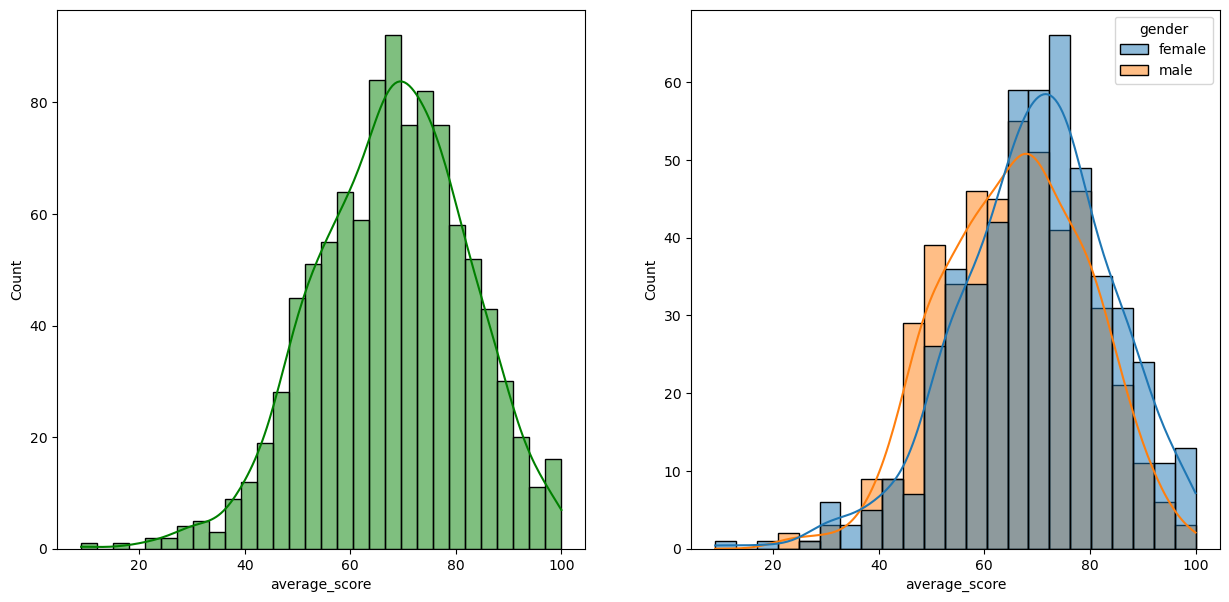

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average_score',kde=True,hue='gender')
plt.show()

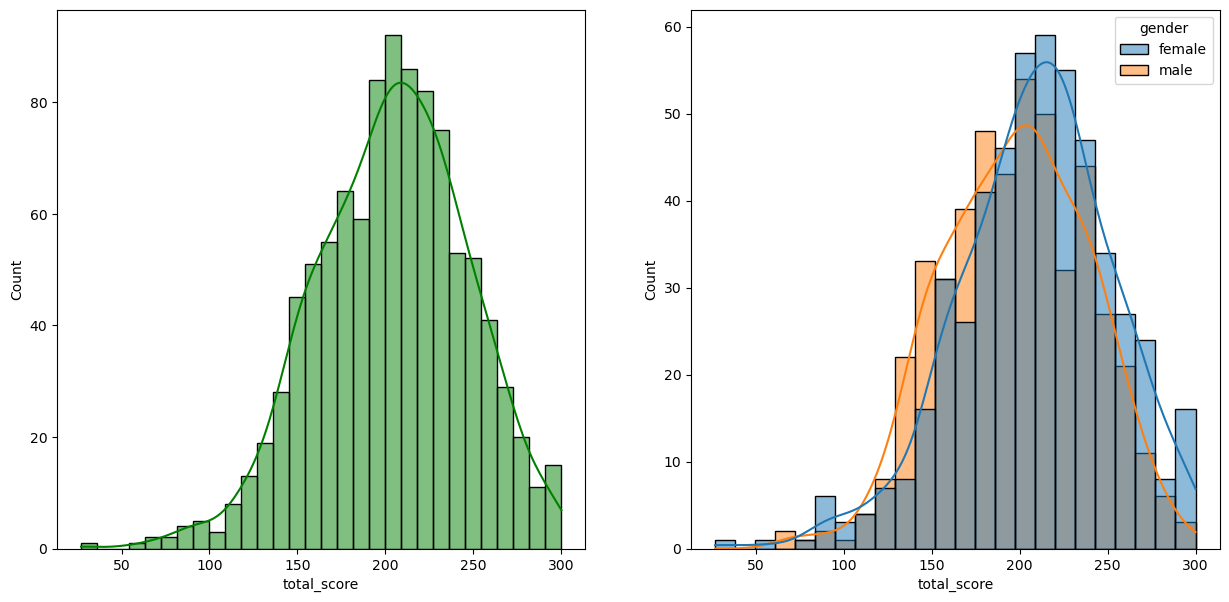

In [24]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total_score',kde=True,hue='gender')
plt.show()

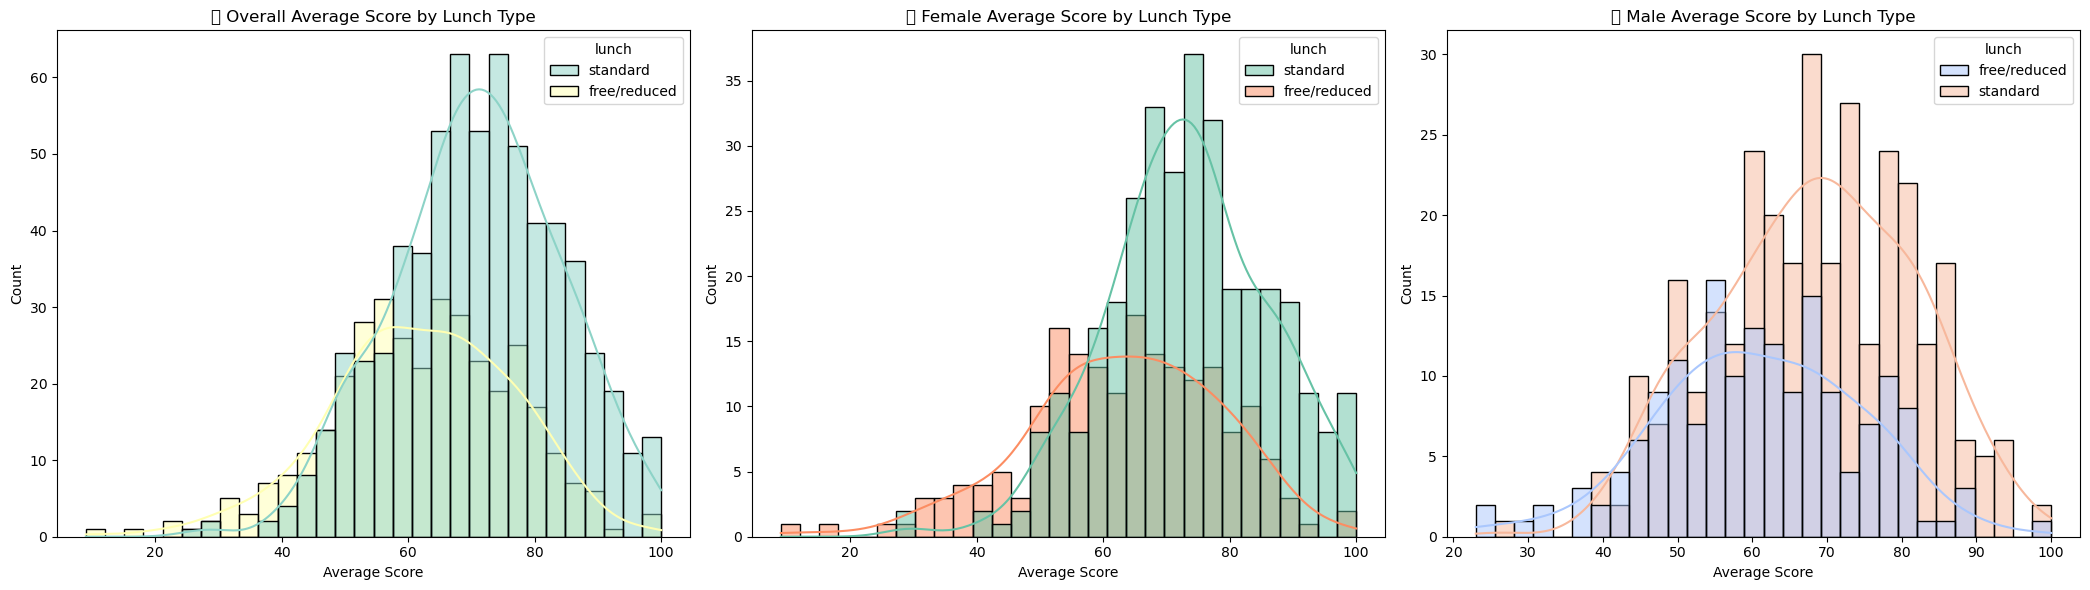

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(21, 6))  # Wider layout for 3 plots

# 📊 Plot 1: Overall Average Score by Lunch Type
plt.subplot(131)
sns.histplot(data=df, x='average_score', hue='lunch', kde=True, bins=30, palette='Set3')
plt.title("🍱 Overall Average Score by Lunch Type")
plt.xlabel("Average Score")
plt.ylabel("Count")

# 👩 Plot 2: Female Average Score by Lunch Type
plt.subplot(132)
sns.histplot(data=df[df['gender'] == 'female'], x='average_score', hue='lunch', kde=True, bins=30, palette='Set2')
plt.title("👩 Female Average Score by Lunch Type")
plt.xlabel("Average Score")
plt.ylabel("Count")

# 👨 Plot 3: Male Average Score by Lunch Type
plt.subplot(133)
sns.histplot(data=df[df['gender'] == 'male'], x='average_score', hue='lunch', kde=True, bins=30, palette='coolwarm')
plt.title("👨 Male Average Score by Lunch Type")
plt.xlabel("Average Score")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

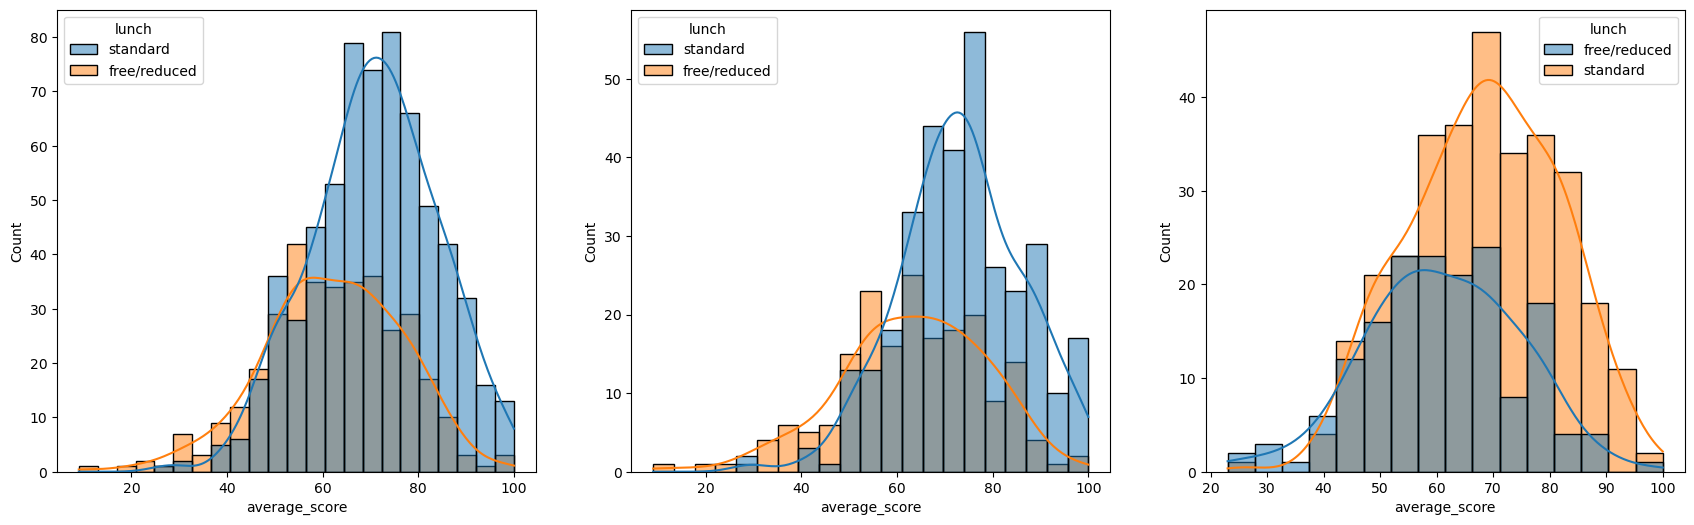

In [26]:
plt.subplots(1,3,figsize=(21,6))
plt.subplot(131)
sns.histplot(data=df,x='average_score',kde=True,hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='lunch')
plt.show()

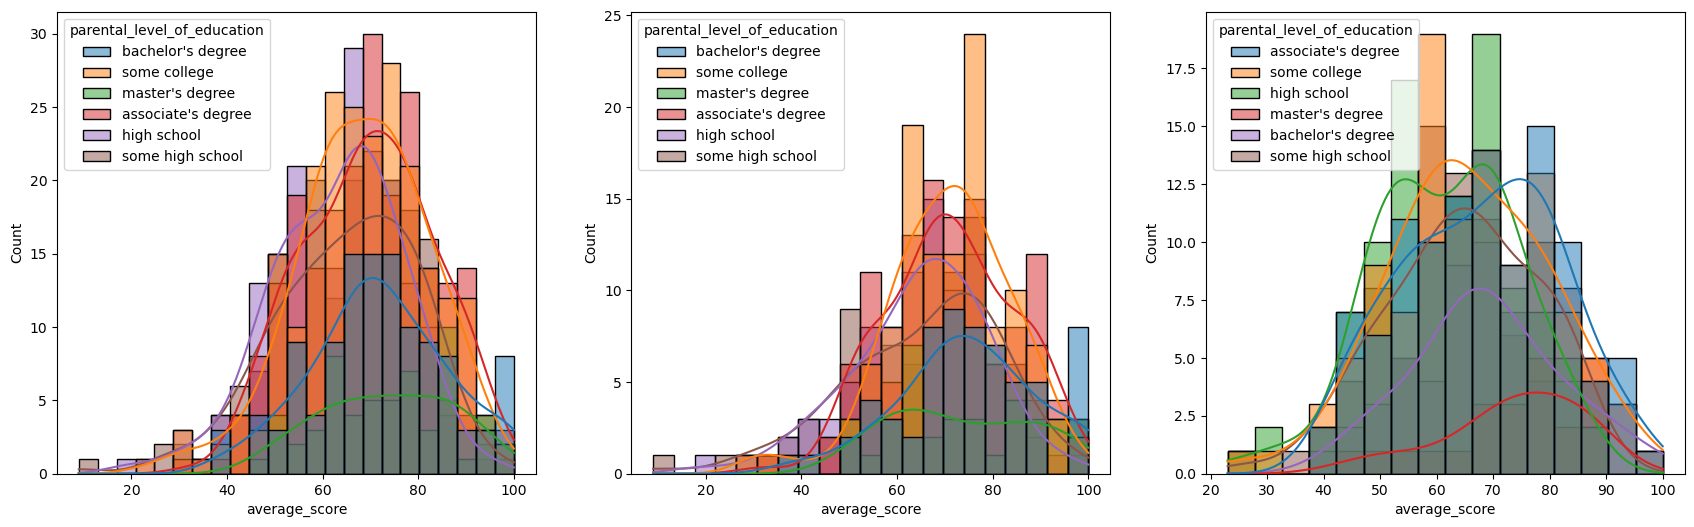

In [27]:
plt.subplots(1,3,figsize=(21,6))
plt.subplot(131)
sns.histplot(data=df,x='average_score',kde=True,hue='parental_level_of_education')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='parental_level_of_education')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='parental_level_of_education')
plt.show()

In [28]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total_score', 'average_score'],
      dtype='object')

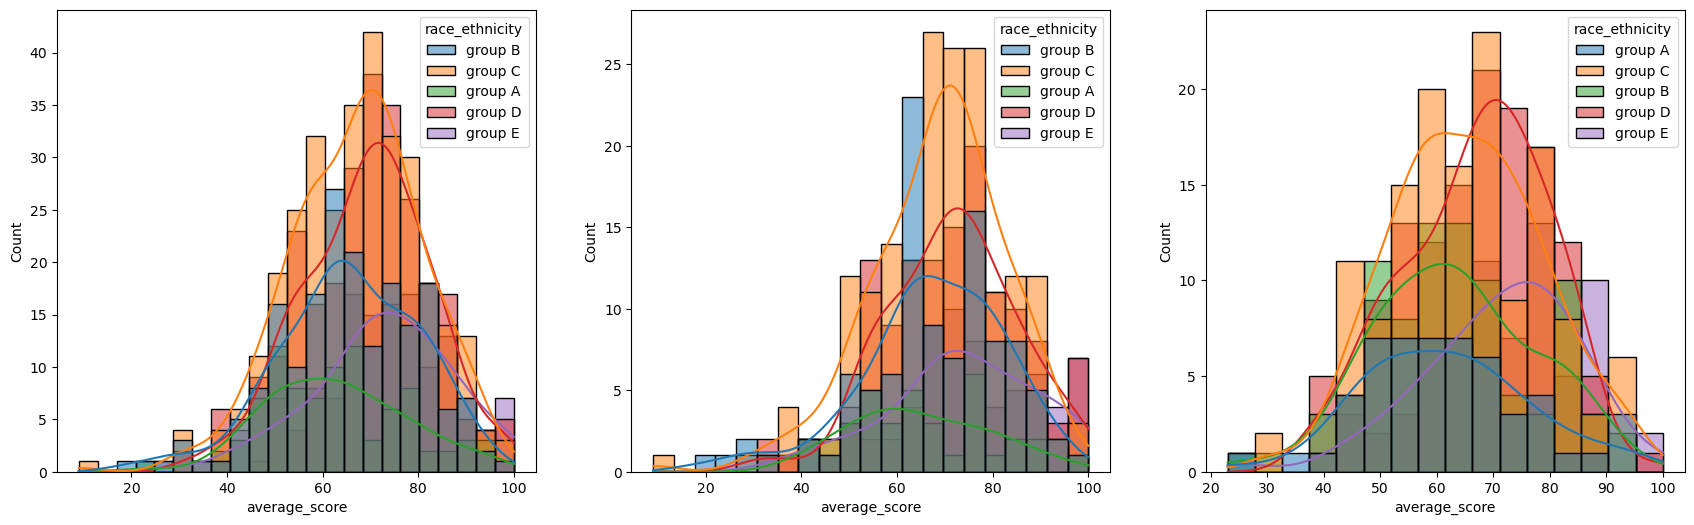

In [29]:
plt.subplots(1,3,figsize=(21,6))
plt.subplot(131)
sns.histplot(data=df,x='average_score',kde=True,hue='race_ethnicity')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='race_ethnicity')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='race_ethnicity')
plt.show()

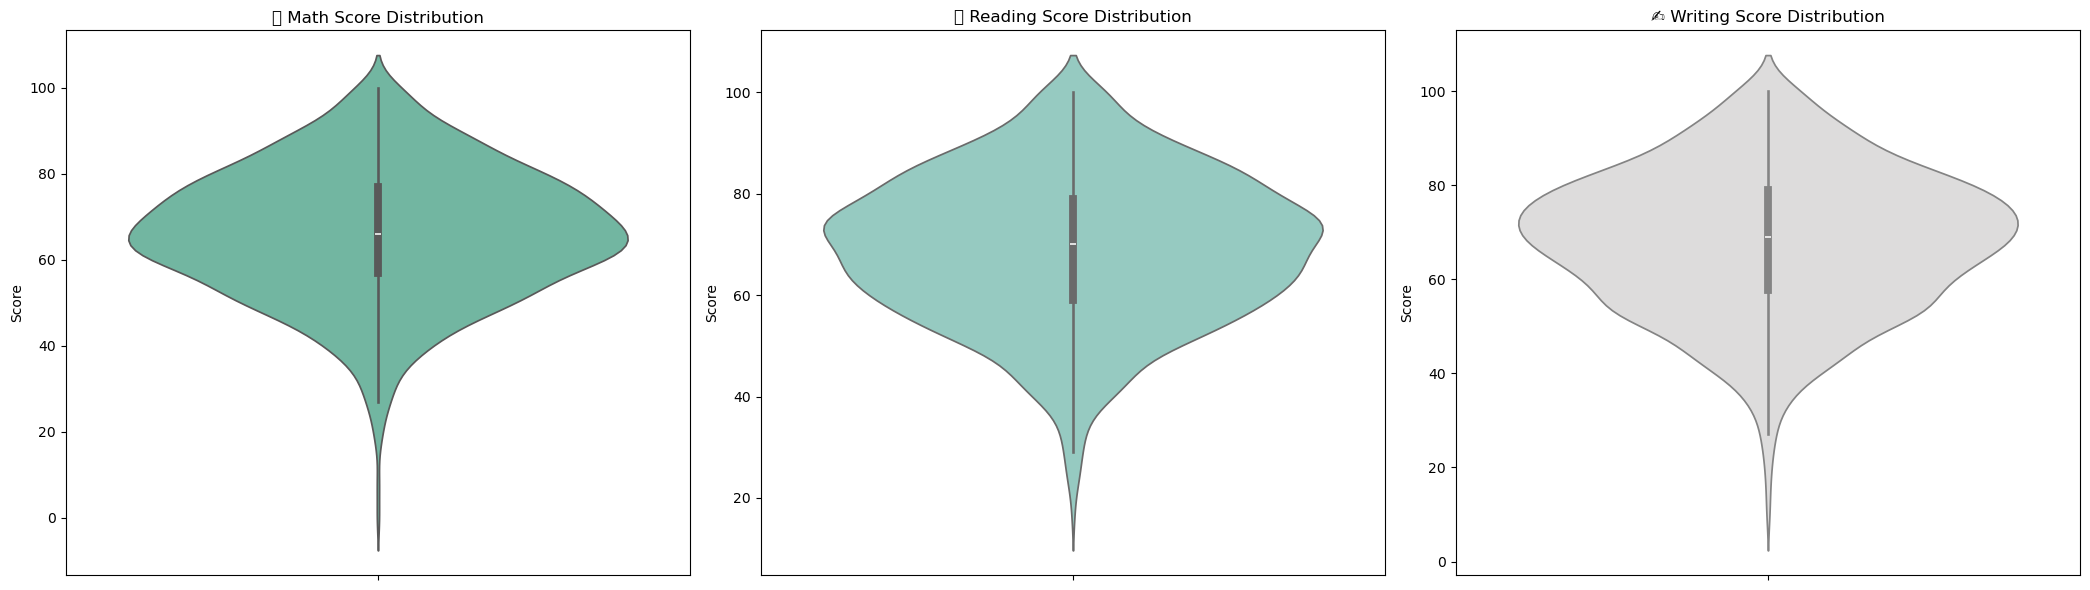

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(21, 6))  # Wider layout for 3 plots

# 🎻 Math Score
plt.subplot(131)
sns.violinplot(y='math_score', data=df, palette='Set2')
plt.title("🎯 Math Score Distribution")
plt.ylabel("Score")
plt.xlabel("")

# 📖 Reading Score
plt.subplot(132)
sns.violinplot(y='reading_score', data=df, palette='Set3')
plt.title("📚 Reading Score Distribution")
plt.ylabel("Score")
plt.xlabel("")

# ✍️ Writing Score
plt.subplot(133)
sns.violinplot(y='writing_score', data=df, palette='coolwarm')
plt.title("✍️ Writing Score Distribution")
plt.ylabel("Score")
plt.xlabel("")

plt.tight_layout()
plt.show()

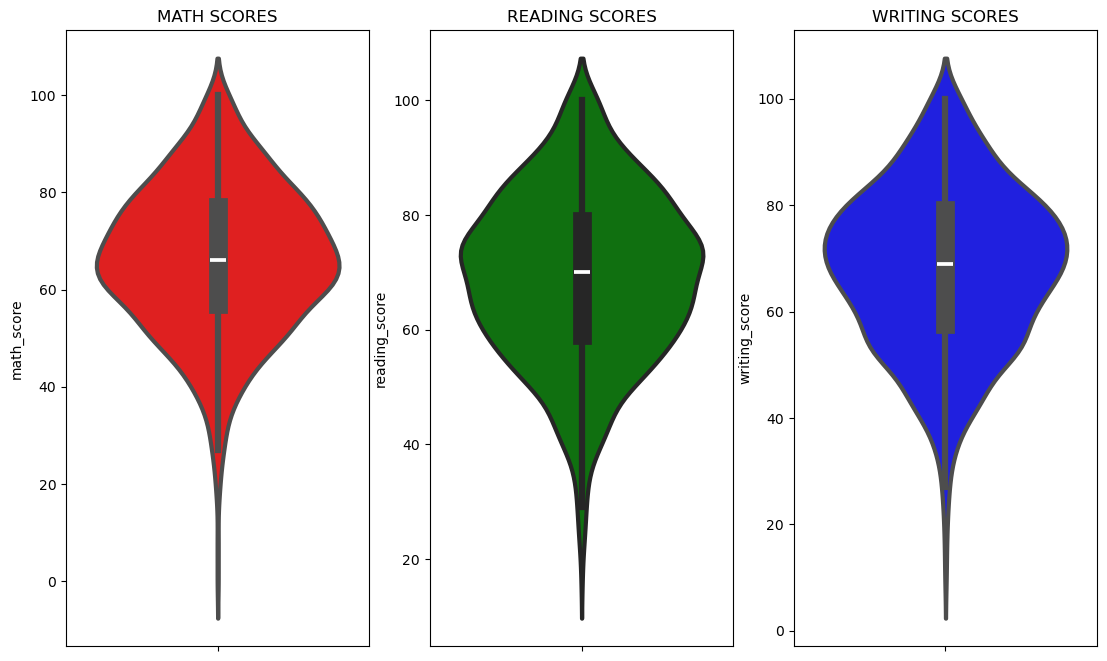

In [31]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

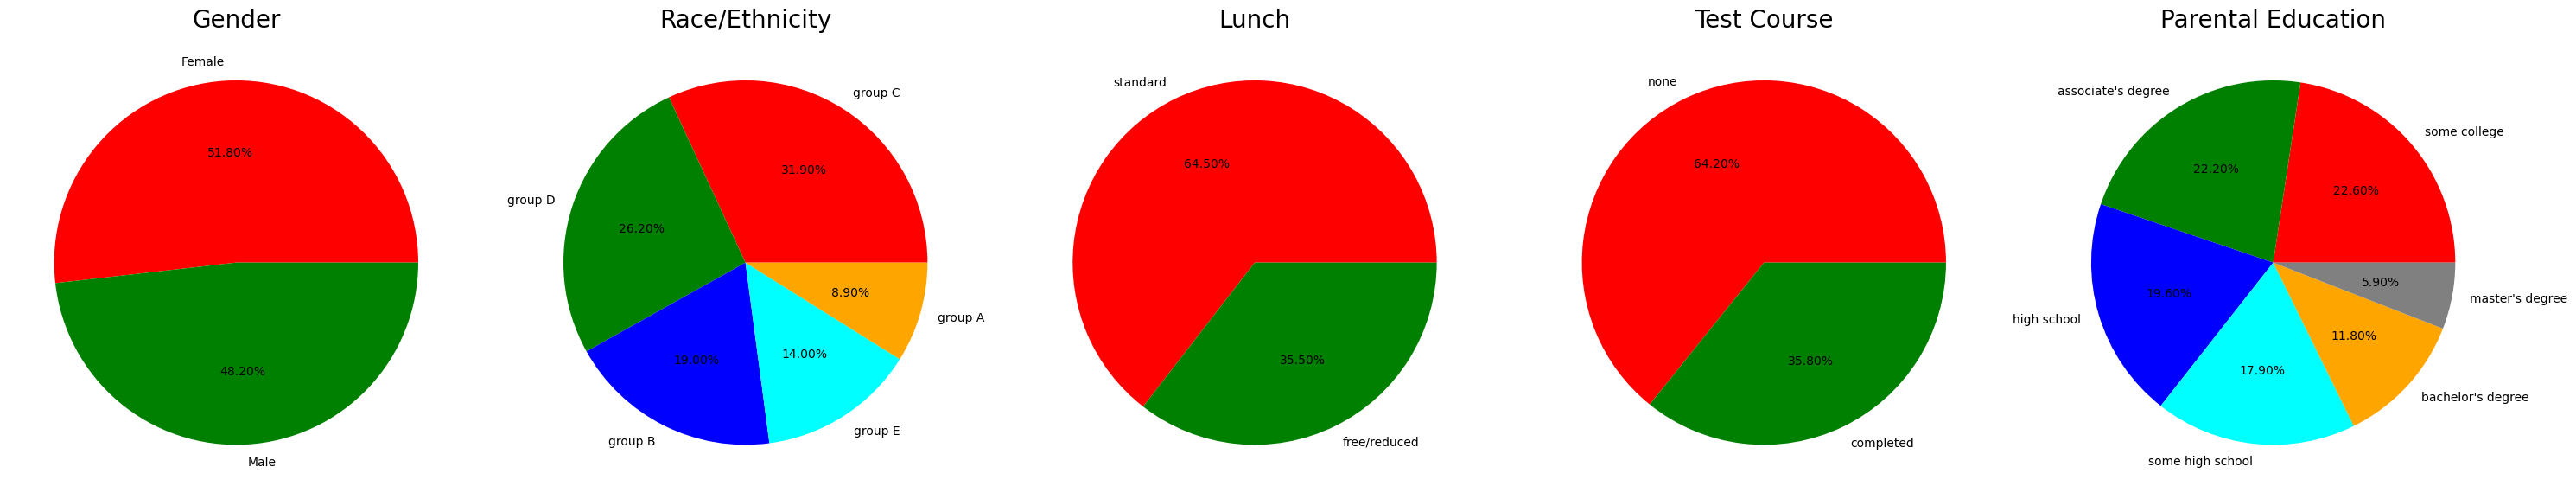

In [32]:
plt.rcParams['figure.figsize'] = (30, 12)

# 🧑‍🤝‍🧑 Gender
plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = ['Female', 'Male']
color = ['red', 'green']
plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Gender', fontsize=20)
plt.axis('off')

# 🧬 Race/Ethnicity
plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = ['group C', 'group D', 'group B', 'group E', 'group A']
color = ['red', 'green', 'blue', 'cyan', 'orange']
plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Race/Ethnicity', fontsize=20)
plt.axis('off')

# 🍱 Lunch
plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = ['standard', 'free/reduced']
color = ['red', 'green']
plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Lunch', fontsize=20)
plt.axis('off')

# 📚 Test Preparation Course
plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = ['none', 'completed']
color = ['red', 'green']
plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Test Course', fontsize=20)
plt.axis('off')

# 🎓 Parental Level of Education
plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = ["some college", "associate's degree", "high school", "some high school", "bachelor's degree", "master's degree"]
color = ['red', 'green', 'blue', 'cyan', 'orange', 'grey']
plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Parental Education', fontsize=20)
plt.axis('off')

plt.tight_layout()
plt.grid()
plt.show()

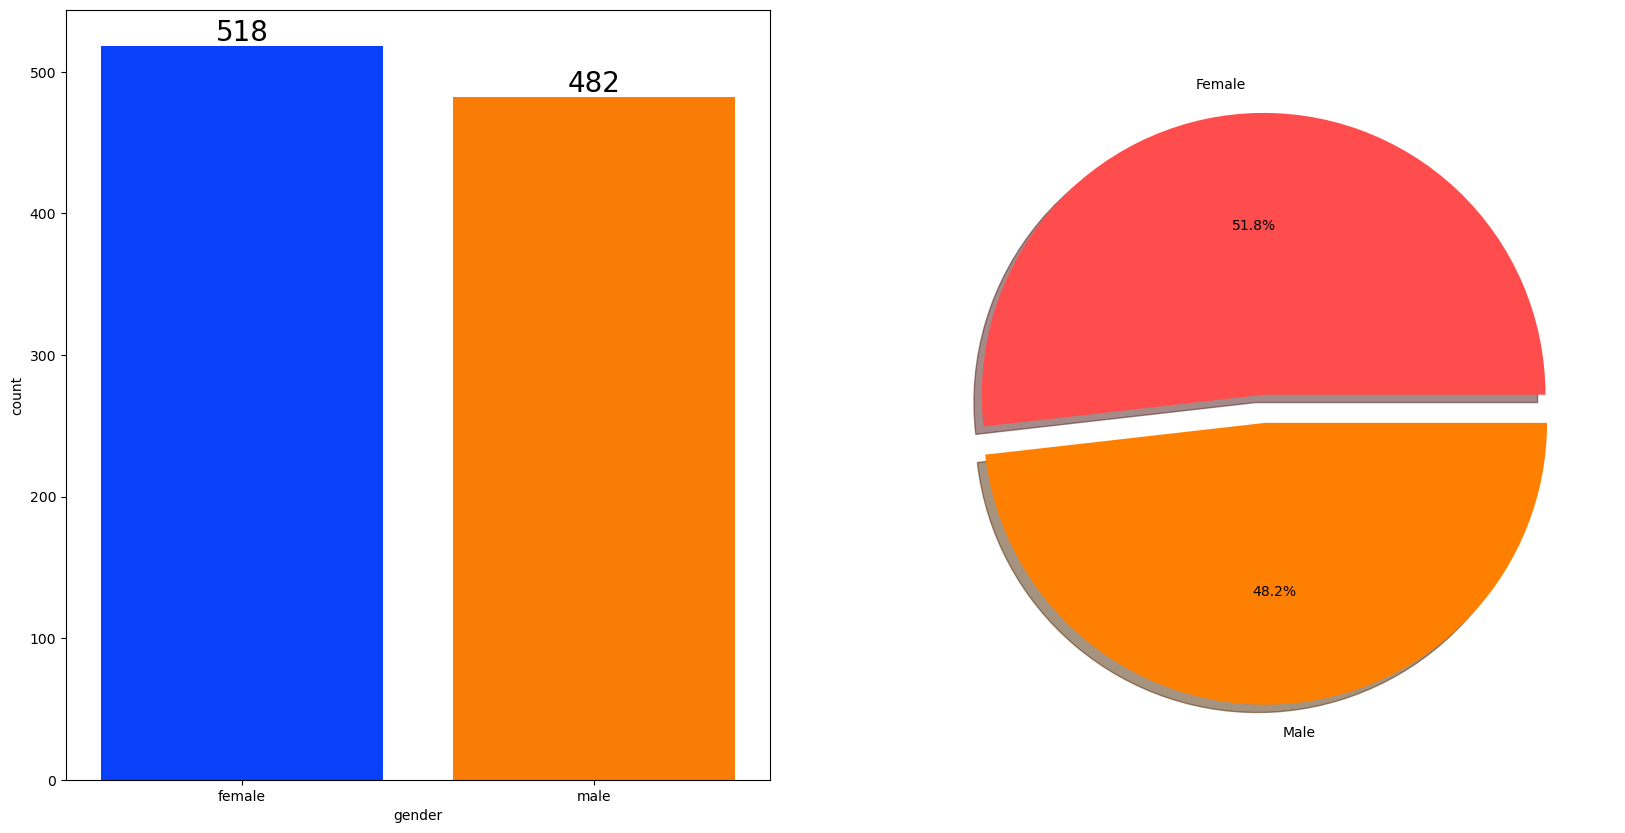

In [33]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Female','Male'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()